# Classificador Bayesiano
Nesse exercício vamos utilizar o classificador Bayesiano da biblioteca Scikit-Learn.<br>
Importar as bibliotecas necessárias.

## Instalar bibliotecas

In [1]:
!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikit-plot
!pip install scipy==1.11.4

Found existing installation: scikit-learn 1.3.2
Uninstalling scikit-learn-1.3.2:
  Successfully uninstalled scikit-learn-1.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


## Exemplo da Aula
Dados do exemplo:
* Idade = ['Jovem', 'Jovem', 'Adulto', 'Idoso', 'Idoso', 'Idoso', 'Adulto', 'Jovem', 'Jovem', 'Idoso', 'Jovem', 'Adulto', 'Adulto', 'Idoso' ]<br>
* Renda = [6300, 5800, 6100, 5200, 2300, 2800, 3100, 4500, 3300, 4800, 4400, 4900, 6000, 4600 ]<br>
* Estudante = ['Nao', 'Nao', 'Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao']<br>
* Crédito = ['Bom', 'Bom', 'Bom', 'Bom', 'Bom', 'Excelente', 'Excelente', 'Bom', 'Bom', 'Bom', 'Excelente', 'Excelente', 'Bom', 'Excelente']<br><br>
* Decisão de compra = ['Nao', 'Nao', 'Sim', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Nao']<br><br>


Importar a biblioteca.

In [2]:
from sklearn.naive_bayes import GaussianNB

Os dados são mapeados para valores numéricos.

In [3]:
X = [[2, 6300.0, 0, 0],
[2, 5800.0, 0, 0],
[0, 6100.0, 0, 0],
[1, 5200.0, 0, 0],
[1, 2300.0, 1, 0],
[1, 2800.0, 1, 1],
[0, 3100.0, 1, 1],
[2, 4500.0, 0, 0],
[2, 3300.0, 1, 0],
[1, 4800.0, 1, 0],
[2, 4400.0, 1, 1],
[0 ,4900.0, 0, 1],
[0 ,6000.0, 1, 0],
[1 ,4600.0, 0, 1]]

Y = [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

A função GaussianNB é o construtor do classificador que fornece os seguintes métodos.<br>
* fit: ajustar o classificador aos dados (treinamento)
* predict: fazer novas previsões

In [4]:
clf = GaussianNB()

Para ajustar o classificador passamos como argumento os dados (X) e as classes previstas (Y).

In [5]:
clf.fit(X, Y)

GaussianNB()

Para realizar pevisões fornecemos novos valores para as features (X_novo) e o classificador retora as previsões (Y_previsto).<br>
O primeiro valor em X_novo é o valor mostrado no exemplo da aula.

In [6]:
X_novo = [[2, 4650.00, 1, 0],
          [1, 3282.70, 0, 1],
          [0, 5282.70, 0, 1]]
Y_previsto = clf.predict(X_novo)
print(Y_previsto)

[1 0 1]


## Desempenho de servidores
Uma empresa quer medir o desempenho de seus servidores para avaliar se estão sobrecarregados. Foram levantados dados do uso da CPU e de memória nos momentos de sobrecarga. Esses atributos que vão definir os pontos onde o servidor está com carga normal ou sobrecarregado. As proporções de utilização de CPU e de memória são definidas por um número entre 0 e 1, onde 0 significa 0% de utilização e 1 significa recurso com 100% de utilização.

### Importar bibliotecas

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import date
import pylab as pl
from sklearn import metrics
import scikitplot as skplt

Os dados de um servidor são produzidos (simulados) por sorteio aleatório pela função *dadosServidor* que retorna dois conjuntos de dados com atributos e rótulos, um para a fase de treinamento e outro para a fase de teste.

In [8]:
def dadosServidor(n_medidas=1000):
    ###############################################################################
    ### constroi o dataset
    ### quantidade de medidas = n_medidas

    ### sorteia as proporcoes de utilizacao de cpu e de memoria
    random.seed(42)
    prop_util_cpu = [random.random() for ii in range(0, n_medidas)]
    prop_util_memoria = [random.random() for ii in range(0, n_medidas)]

    ### sorteia uma ocilacao (erro) para gerar os valores de y (rotulos)
    ### depois desse passo, y tera valores iguais a 0 ou 1
    ### dependendo das proporções de utilizacao da cpu, da memoria, e da oscilacao
    erro = [random.random() for ii in range(0, n_medidas)]
    y = [round(prop_util_cpu[ii] * prop_util_memoria[ii] + 0.3 + 0.1 * erro[ii]) for ii in range(0, n_medidas)]

    ### para casos mais criticos forca y = 1
    for ii in range(0, len(y)):
        if prop_util_cpu[ii] > 0.9 or prop_util_memoria[ii] > 0.9:
            y[ii] = 1.0

    ### divide nos conjuntos trein e test
    ### 75% vai para treinamento e 25% vai para teste
    X = [[gg, ss] for gg, ss in zip(prop_util_cpu, prop_util_memoria)]
    split = int(0.75 * n_medidas)
    X_trein = X[0:split]
    X_test = X[split:]
    Y_trein = y[0:split]
    Y_test = y[split:]

    return X_trein, Y_trein, X_test, Y_test

Chamar a função dadosServidor para gerar os dados que serão utilizados.

In [9]:
X_trein, Y_trein, X_test, Y_test = dadosServidor()
print(np.size(X_test))
print(np.size(Y_test))

500
250


Vamos vizualizar o os resultados da classificação através de gráficos.<br><br>
Primeiro vamos imprimir o gráfico com o conjunto de dados de treinamento com as respectivas classificações (rótulos).<br>
* As coordenadas de cada ponto (números entre 0 e 1) foram definidas pelos dois atributos, utilização de CPU e utilização de mamória.
* A cor de cada ponto é definida pelo rótulo do estado do servidor (carga normal ou carga alta).
* Pontos onde o rótulo determina que a carga da cpu está normal foram coloridos de azul enquanto pontos onde o rótulo determina que a cpu está sobregarregada foram coloridos de vermelho.<br>

O gráfico é plotado pela função figuraTreinamento.

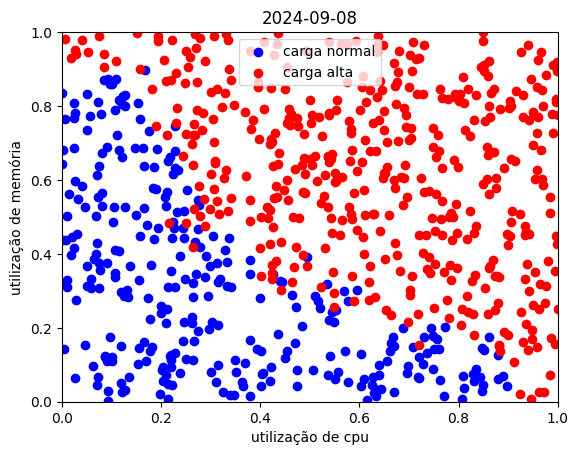

In [10]:
def figuraTreinamento(X_trein, y_trein):
    ### Prepara a plotagem dos pontos de treinamento
    ### os dados de treinamento (X_trein, y_trein) possuem pontos "rapido" e "devagar" misturados
    ### separar para dar cores diferentes no scatterplot
    cpu_normal = [X_trein[ii][0] for ii in range(0, len(X_trein)) if y_trein[ii] == 0]
    memoria_normal = [X_trein[ii][1] for ii in range(0, len(X_trein)) if y_trein[ii] == 0]
    cpu_alta = [X_trein[ii][0] for ii in range(0, len(X_trein)) if y_trein[ii] == 1]
    memoria_alta = [X_trein[ii][1] for ii in range(0, len(X_trein)) if y_trein[ii] == 1]

    # Limites dos eixos
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.0)

    # Scatter plot
    plt.scatter(cpu_normal, memoria_normal, color="b", label="carga normal")
    plt.scatter(cpu_alta, memoria_alta, color="r", label="carga alta")

    # Legenda
    plt.legend()
    plt.xlabel("utilização de cpu")
    plt.ylabel("utilização de memória")

    # Titulo
    plt.title(date.today())
    plt.show()

    # Salva figura
    plt.savefig("treinamento.png")
    plt.close()


figuraTreinamento(X_trein, Y_trein)

## FORMATIVA
O classificador bayesiano deve ser construído e treinado por comandos que serão incluídos a seguir.<br>
Para treinar o classificador deve-se usar os dados de treinamento.<br><br>

Utilizar a biblioteca GaussianNB:<br>
* Criar o classificador
* Ajustar (treinar) o classificador com os dados gerados (X_trein e T_trein)
* Fazer as previsões usando X_test e salvar e Y_previsto

In [11]:
 # Criar o classificador
 classificador = GaussianNB()
 # Ajustar (treinar) o classificador com os dados gerados (X_trein e T_trein)
 classificador.fit(X_trein, Y_trein)
 # Fazer as previsões usando X_test e salvar em Y_previsto
 Y_previsto = classificador.predict(X_test)

Para tornar a demonstração da classificação mais visual usamos a função *figuraTeste* para plotar os pontos do conjunto de teste em um fundo colorido que representa o limite de decisão.<br>
* Os pontos são plotados da mesma forma que foram plotados os pontos de treinamento.
* O limite de decisão é plotado usando-se uma grade de pontos que são coloridos de acordo com a previsão feita pelo classificador levando-se em conta as respectivas coordenadas.

O conjunto de dados de teste é usado demonstrar o funcionamento do classificador.<br>
Utilizamos o classificador bayesiano treinado para fazer a previsão dos pontos que estão no conjunto de teste.<br>

A função *figuraTeste* utiliza o classificador treinado para colorir o limite de decisão que separa a carga normal da carga alta do servidor:
* Recebe como argumento o classificador treinado e os dados de teste
* Usa o classificador para colorir o limite de decisão
* Usa o conjunto de teste para mostrar como estão os pontos do conjunto de teste con relação ao limite de decisão<br> <br>

A figura abaixo mostra um exemplo, com o resultado da classificação, incluindo os pontos do conjunto de teste e o limite de decisão.<br>

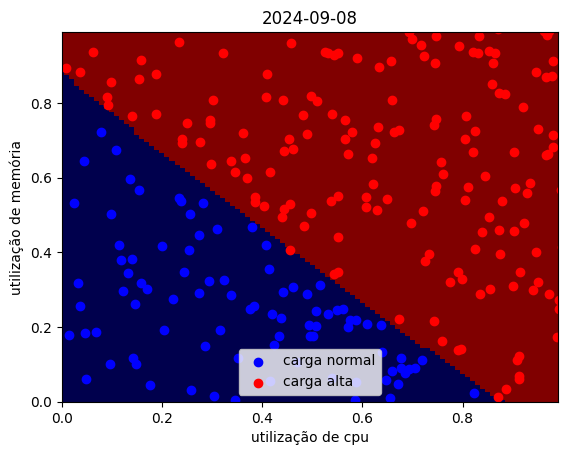

In [16]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
 # Supondo que X_trein e T_trein estejam definidos



 # Criar o classificador
clf = GaussianNB()
 # Ajustar (treinar) o classificador com os dados gerados (X_trein e T_trein)
clf.fit(X_trein, Y_trein)
 # Fazer as previsões usando X_test e salvar em Y_previsto
Y_previsto = clf.predict(X_test)
 # Definir a função figuraTeste
def figuraTeste(clf, X_test, y_test):
    x_min = 0.0
    x_max = 1.0
    y_min = 0.0
    y_max = 1.0
    #####################################################################
    # Esse trecho do codigo plota figura com o limite de decisao
    ######################################################################
    # Construir uma grade de pontos com os eixos x e y com entre 0.0 e 1.0
    # O passo da grade é h = 0.01
    h = .01  # tamanho do passo na construção do mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    ## Fazer a previsão para cada ponto e salvar no array Z
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ## O valor da previsão em Z determina a cor de cada ponto (argumento cmap)
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.seismic)
    ###############################################################
    # Essa parte do codigo prepara a plotagem dos pontos de teste
    ###############################################################
    ### dados de teste (X_test, y_test) possuem pontos "carga normal" e "carga alta" misturados
    ### separar para dar cores diferentes no scatterplot
    ### assim podem ser identificados
    cpu_normal = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii] == 0]
    memoria_normal = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii] == 0]
    cpu_alta = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii] == 1]
    memoria_alta = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii] == 1]
    ### colore os pontos com label = 1 (carga normal) de azul
    ### colore os pontos com label = 0 (sobrecarregado) de vermelho
    plt.scatter(cpu_normal, memoria_normal, color="b", label="carga normal")
    plt.scatter(cpu_alta, memoria_alta, color="r", label="carga alta")
    #############################################################
    # Fim da preparação da plotagem dos pontos de teste
    ############################################################
    # Legenda
    plt.legend()
    plt.xlabel("utilização de cpu")
    plt.ylabel("utilização de memória")
    plt.title(str(date.today()))
    plt.show()
    # Salva figura
    plt.savefig("teste.png")
    plt.close()
 # Chamar a função figuraTeste
figuraTeste(clf, X_test, Y_previsto)

### A biblioteca sklearn fornece o módulo metrics com métricas de classificação.

In [17]:
print(f"Métricas de classificação\n"
      f"{metrics.classification_report(Y_test, Y_previsto)}\n")

Métricas de classificação
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85        92
         1.0       0.91      0.92      0.92       158

    accuracy                           0.89       250
   macro avg       0.89      0.88      0.88       250
weighted avg       0.89      0.89      0.89       250




### A biblioteca scikitplot fornece um módulo metrics com graficos para avaliação de algoritmos de classificação.

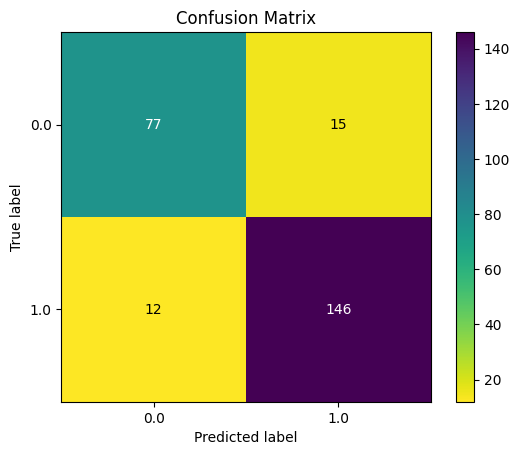

In [18]:
skplt.metrics.plot_confusion_matrix(Y_test,Y_previsto,cmap='viridis_r');

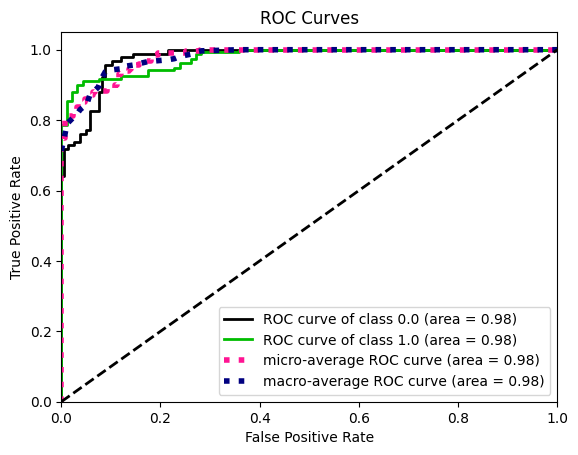

In [19]:
Y_prev_proba = clf.predict_proba(X_test)
skplt.metrics.plot_roc(Y_test, Y_prev_proba);